In [1]:
from natsort import natsorted
import cv2

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import re
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import sys
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import *
from natsort import natsorted
#from tensorflow.keras.engine import Layer
from tensorflow.keras.applications.vgg16 import *
from tensorflow.keras.models import *
#from tensorflow.keras.applications.imagenet_utils import _obtain_input_shape
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Cropping2D, Conv2D
from tensorflow.keras.layers import Input, Add, Dropout, Permute, add
from tensorflow.compat.v1.layers import conv2d_transpose
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
# tf.debugging.set_log_device_placement(True)

# strategy = tf.distribute.MirroredStrategy(devices=["/gpu:3"])

In [3]:
frame_folders = ['pass5-10/all_frames','pass11-15/all_frames','pass16-20/all_frames','pass21-25/all_frames','pass26-30/all_frames','pass31-35/all_frames','pass36-41/all_frames']
mask_folders = ['pass5-10/all_masks','pass11-15/all_masks','pass16-20/all_masks','pass21-25/all_masks','pass26-30/all_masks','pass31-35/all_masks','pass36-41/all_masks']
zbuff_folders = ['pass5-10/all_zbuffs','pass11-15/all_zbuffs','pass16-20/all_zbuffs','pass21-25/all_zbuffs','pass26-30/all_zbuffs','pass31-35/all_zbuffs','pass36-41/all_zbuffs']
folders = [frame_folders,mask_folders,zbuff_folders]
all_frames = []
all_masks = []
all_zbuffs = []

In [4]:
for folder in folders:
  #print(folder)
  if folder is frame_folders:
    #print(folder)
    for folder2 in natsorted(folder):
      #print(folder2)
      for frame in natsorted(os.listdir(folder2)):
        frame_pic = os.path.join(folder2,frame)
        #print(frame_pic)
        all_frames.append(frame_pic)

  if folder is mask_folders:
        #print(folder)
    for folder2 in natsorted(folder):
      #print(folder2)
      for mask in natsorted(os.listdir(folder2)):
        mask_pic = os.path.join(folder2,mask)
        #print(mask)
        all_masks.append(mask_pic)

  if folder is zbuff_folders:
    for folder2 in natsorted(folder):
     # print(folder2)
      for zbuff in natsorted(os.listdir(folder2)):
        zbuff_pic = os.path.join(folder2,zbuff)
        #print(zbuff)
        all_zbuffs.append(zbuff_pic)
    


In [5]:
all_frames = natsorted(all_frames)
all_masks = natsorted(all_masks)
all_zbuffs = natsorted(all_zbuffs)

In [6]:
l_frame_paths = []
for i in range(0,len(all_frames),2):
      l_frame_paths.append(all_frames[i])
print('l_frames: ', l_frame_paths)

r_frame_paths = []
for i in range(1,len(all_frames),2):
      r_frame_paths.append(all_frames[i])
print('r_frames: ',r_frame_paths)

l_mask_paths = []
for i in range(0,len(all_frames),2):
      l_mask_paths.append(all_masks[i])
print('l_masks: ', l_mask_paths)

r_mask_paths = []
for i in range(1,len(all_frames),2):
      r_mask_paths.append(all_masks[i])
print('r_masks: ', r_mask_paths)

l_zbuff_paths = []
for i in range(0,len(all_zbuffs),2):
      l_zbuff_paths.append(all_zbuffs[i])
print('l_zbuffs: ', l_zbuff_paths)

r_zbuff_paths = []
for i in range(1,len(all_zbuffs),2):
      r_zbuff_paths.append(all_zbuffs[i])
print('r_zbuffs: ', r_zbuff_paths)

l_frames:  ['pass5-10/all_frames/Frame1.png', 'pass5-10/all_frames/Frame3.png', 'pass5-10/all_frames/Frame5.png', 'pass5-10/all_frames/Frame7.png', 'pass5-10/all_frames/Frame9.png', 'pass5-10/all_frames/Frame11.png', 'pass5-10/all_frames/Frame13.png', 'pass5-10/all_frames/Frame15.png', 'pass5-10/all_frames/Frame17.png', 'pass5-10/all_frames/Frame19.png', 'pass5-10/all_frames/Frame21.png', 'pass5-10/all_frames/Frame23.png', 'pass5-10/all_frames/Frame25.png', 'pass5-10/all_frames/Frame27.png', 'pass5-10/all_frames/Frame29.png', 'pass5-10/all_frames/Frame31.png', 'pass5-10/all_frames/Frame33.png', 'pass5-10/all_frames/Frame35.png', 'pass5-10/all_frames/Frame37.png', 'pass5-10/all_frames/Frame39.png', 'pass5-10/all_frames/Frame41.png', 'pass5-10/all_frames/Frame43.png', 'pass5-10/all_frames/Frame45.png', 'pass5-10/all_frames/Frame47.png', 'pass5-10/all_frames/Frame49.png', 'pass5-10/all_frames/Frame51.png', 'pass5-10/all_frames/Frame53.png', 'pass5-10/all_frames/Frame55.png', 'pass5-10/all

In [7]:
label_codes = ([(0,0,0), # colour codes for using generator
(0,44,99),
(208,205,206),
(132,203,239),
(110,65,189),
(164,175,230),
(105,30,118),
(179,212,144),
(27,86,73),
(31,125,8),
(2,146,228),
(68,254,231),
(38,121,190),
(105,137,155),
(211,106,112),
(147,41,158),
(18,233,208),
(113,190,7),
(245,129,204),
(135,210,143),
(100,103,113),
(108,144,181),
(109,206,231),
(158,5,80),
(190,58,27)])

# label_codes = ([(0,0,0),        ## These are the colour codes for feeding as numpy arrays
# (99,44,0),
# (206,205,208),
# (239,203,132),
# (189,65,110),
# (230,175,164),
# (118,30,105),
# (144,212,179),
# (73,86,27),
# (8,125,31),
# (228,146,2),
# (231,254,68),
# (190,121,38),
# (155,137,105),
# (112,106,211),
# (158,41,147),
# (208,233,18),
# (7,190,113),
# (204,129,245),
# (143,210,135),
# (113,103,100),
# (181,144,108),
# (231,206,109),
# (80,5,158),
# (27,58,190)])


label_names = (['Background',
'Apple',
'Avocado',
'Muffin',
'Lemon',
'Ginger',
'Garlic',
'Carrot',
'Foodfight',
'Ralphie',
'Corn',
'Courgette',
'Kiwi',
'Parsnip',
'Playmobil',
'Plum',
'Pomegranate'
'Robin',
'Roll',
'Scone',
'Seeded',
'Sprout',
'Thor',
'Tomato',
'Corn2'
])

In [8]:
code2id = {v:k for k,v in enumerate(label_codes)}
id2code = {k:v for k,v in enumerate(label_codes)}
name2id = {v:k for k,v in enumerate(label_names)}
id2name = {k:v for k,v in enumerate(label_names)}

In [9]:

def rgb_to_onehot(rgb_image, colormap = id2code):
    '''Function to one hot encode RGB mask labels
        Inputs: 
            rgb_image - image matrix (eg. 256 x 256 x 3 dimension numpy ndarray)
            colormap - dictionary of color to label id
        Output: One hot encoded image of dimensions (height x width x num_classes) where num_classes = len(colormap)
    '''
    #print(rgb_image.shape)
    num_classes = len(colormap)
    shape = rgb_image.shape[:2]+(num_classes,)
    #print(shape)
    encoded_image = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(colormap):
        #print('i is: ', i)
        #print('cls is: ', cls)
        #encoded_image[:,:,i] = np.where(rgb_image==colormap[i],encoded_image[:,:,i],colormap[cls]).reshape(shape[:2])
        encoded_image[:,:,i] = np.all(rgb_image.reshape( (-1,3) ) == colormap[i], axis=1).reshape(shape[:2])
        #print(rgb_image.shape)
        #encoded_image[:,:,i] = np.argmax(encoded_image[:,:,i])
        #encoded_image[:,:,i] = np.where(encoded_image[:,:,i]== 1,encoded_image[:,:,i],255)
        #encoded_image = 1-encoded_image
    return encoded_image


def onehot_to_rgb(onehot, colormap = id2code):
    '''Function to decode encoded mask labels
        Inputs: 
            onehot - one hot encoded image matrix (height x width x num_classes)
            colormap - dictionary of color to label id
        Output: Decoded RGB image (height x width x 3) 
    '''
    
    single_layer = np.argmax(onehot, axis=2)
    #print(single_layer)
    output = np.zeros(onehot.shape[:2]+(3,) )
    for k in colormap.keys():
        #print(k)
        output[single_layer==k] = colormap[k]
    return np.uint8(output)

In [10]:
frame_train_args = dict()
mask_train_args = dict()
zbuff_train_args = dict()
l_train_gen = ImageDataGenerator(**frame_train_args)
r_train_gen = ImageDataGenerator(**frame_train_args)
zbuff_train_gen = ImageDataGenerator(**zbuff_train_args)
target_train_gen = ImageDataGenerator(**mask_train_args)



In [11]:
frame_val_args = dict()
mask_val_args = dict()
zbuff_val_args = dict()
l_val_gen = ImageDataGenerator(**frame_val_args)
r_val_gen = ImageDataGenerator(**frame_val_args)
zbuff_val_gen = ImageDataGenerator(**zbuff_val_args)
target_val_gen = ImageDataGenerator(**mask_val_args)

In [12]:
frame_test_args = dict()
mask_test_args = dict()
zbuff_test_args = dict()
l_test_gen = ImageDataGenerator(**frame_test_args)
r_test_gen = ImageDataGenerator(**frame_test_args)
zbuff_test_gen = ImageDataGenerator(**zbuff_test_args)
target_test_gen = ImageDataGenerator(**mask_test_args)

In [13]:
batch_size = 8

In [14]:
def StereoDepthGen(batch_size = batch_size, seed = 5, target_size = (224,224)):  ## Two Inputs, two outputs

      data_path = 'GeneratorData/'
        
      left_gen = l_train_gen.flow_from_directory('GeneratorData/l_train_frames/',batch_size = batch_size,
                                           target_size = target_size, shuffle = False,
                                           seed = 5)
  
      right_gen = r_train_gen.flow_from_directory('GeneratorData/r_train_frames/', batch_size= batch_size,
                                            target_size = target_size, shuffle = False,
                                            seed = 5)
      depth_gen = zbuff_train_gen.flow_from_directory('GeneratorData/l_train_zbuffs/', batch_size = batch_size,
                                                     target_size = target_size, shuffle = False,
                                                     seed = 5)
    
  
      left_mask = target_train_gen.flow_from_directory('GeneratorData/l_train_masks/', batch_size = batch_size,
                                                  target_size = target_size, shuffle = False,
                                                  seed = 5)
  
      right_mask = target_train_gen.flow_from_directory('GeneratorData/r_train_masks/', batch_size = batch_size,
                                                  target_size = target_size, shuffle = False,
                                                  seed = 5)
  
      while True:
        left = left_gen.next()
        right = right_gen.next()
        depth= depth_gen.next()
        left_target = left_mask.next()
        right_target = right_mask.next()
        l_mask = [rgb_to_onehot(left_target[0][x,:,:,:], id2code) for x in range(left_target[0].shape[0])]
        r_mask = [rgb_to_onehot(right_target[0][x,:,:,:], id2code) for x in range(right_target[0].shape[0])]

        yield [left[0],right[0],depth[0]], [np.asarray(l_mask),np.asarray(r_mask),np.asarray(depth[0])]


In [15]:
def StereoDepthGenVal(batch_size = batch_size, seed = 5, target_size = (224,224)):  ## Two Inputs, two outputs

      data_path = 'GeneratorData/'
        
      left_gen = l_val_gen.flow_from_directory('GeneratorData/l_val_frames/',batch_size = batch_size,
                                           target_size = target_size, shuffle = False,
                                           seed = 5)
  
      right_gen = r_val_gen.flow_from_directory('GeneratorData/r_val_frames/', batch_size= batch_size,
                                            target_size = target_size, shuffle = False,
                                            seed = 5)
      depth_gen = zbuff_val_gen.flow_from_directory('GeneratorData/l_val_zbuffs/', batch_size = batch_size,
                                                     target_size = target_size, shuffle = False,
                                                     seed = 5)
    
  
      left_mask = target_val_gen.flow_from_directory('GeneratorData/l_val_masks/', batch_size = batch_size,
                                                  target_size = target_size, shuffle = False,
                                                  seed = 5)
  
      right_mask = target_val_gen.flow_from_directory('GeneratorData/r_val_masks/', batch_size = batch_size,
                                                  target_size = target_size, shuffle = False,
                                                  seed = 5)
  
      while True:
        left = left_gen.next()
        right = right_gen.next()
        depth= depth_gen.next()
        left_target = left_mask.next()
        right_target = right_mask.next()
        l_mask = [rgb_to_onehot(left_target[0][x,:,:,:], id2code) for x in range(left_target[0].shape[0])]
        r_mask = [rgb_to_onehot(right_target[0][x,:,:,:], id2code) for x in range(right_target[0].shape[0])]

        yield [left[0],right[0],depth[0]], [np.asarray(l_mask),np.asarray(r_mask),np.asarray(depth[0])]

In [16]:
def StereoDepthGenTest(batch_size = 15, seed = 5, target_size = (224,224)):  ## Two Inputs, two outputs

      data_path = 'GeneratorData/'
        
      left_gen = l_test_gen.flow_from_directory('GeneratorData/l_test_frames/',batch_size = batch_size,
                                           target_size = target_size, shuffle = True,
                                           seed = 5)
  
      right_gen = r_test_gen.flow_from_directory('GeneratorData/r_test_frames/', batch_size= batch_size,
                                            target_size = target_size, shuffle = True,
                                            seed = 5)
      depth_gen = zbuff_test_gen.flow_from_directory('GeneratorData/l_test_zbuffs/', batch_size = batch_size,
                                                     target_size = target_size, shuffle = True,
                                                     seed = 5)
    
  
      left_mask = target_test_gen.flow_from_directory('GeneratorData/l_test_masks/', batch_size = batch_size,
                                                  target_size = target_size, shuffle = True,
                                                  seed = 5)
  
      right_mask = target_test_gen.flow_from_directory('GeneratorData/r_test_masks/', batch_size = batch_size,
                                                  target_size = target_size, shuffle = True,
                                                  seed = 5)
  
      while True:
        left = left_gen.next()
        right = right_gen.next()
        depth= depth_gen.next()
        left_target = left_mask.next()
        right_target = right_mask.next()
        l_mask = [rgb_to_onehot(left_target[0][x,:,:,:], id2code) for x in range(left_target[0].shape[0])]
        r_mask = [rgb_to_onehot(right_target[0][x,:,:,:], id2code) for x in range(right_target[0].shape[0])]

        yield [left[0],right[0],depth[0]], [np.asarray(l_mask),np.asarray(r_mask),np.asarray(depth[0])]


In [17]:

# Ref: salehi17, "Twersky loss function for image segmentation using 3D FCDN"
# -> the score is computed for each class separately and then summed
# alpha=beta=0.5 : dice coefficient
# alpha=beta=1   : tanimoto coefficient (also known as jaccard)
# alpha+beta=1   : produces set of F*-scores
# implemented by E. Moebel, 06/04/18
def tversky_loss(y_true, y_pred):
    alpha = 0.5
    beta  = 0.5
    
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    
    num = K.sum(p0*g0, (0,1,2,3))
    den = num + alpha*K.sum(p0*g1,(0,1,2,3)) + beta*K.sum(p1*g0,(0,1,2,3))
    
    T = K.sum(num/den) # when summing over classes, T has dynamic range [0 Ncl]
    
    Ncl = K.cast(K.shape(y_true)[-1], 'float32')
    return Ncl-T


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1.-dice_coef(y_true, y_pred)

In [18]:
# def stereoDepthNet():   
#     with strategy.scope():
#         n_filters =16
#         left_in = Input(shape = (224,224,3))
#         right_in = Input(shape = (224,224,3))
#         depth_in = Inpur(shape = (224,224,3))

#         l_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(left_in)
#         l_conv1 = BatchNormalization()(l_conv1)
#         l_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_conv1)
#         l_conv2 = BatchNormalization()(l_conv2)
#         l_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv2)

#         l_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_pool1)
#         l_conv3 = BatchNormalization()(l_conv1)
#         l_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_conv3)
#         l_conv4 = BatchNormalization()(l_conv2)
#         l_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv4)

#         l_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_pool2)
#         l_conv5 = BatchNormalization()(l_conv5)
#         l_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_conv5)
#         l_conv6 = BatchNormalization()(l_conv6)
#         l_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv6)

#         l_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_pool3)
#         l_conv7 = BatchNormalization()(l_conv7)
#         l_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_conv7)
#         l_conv8 = BatchNormalization()(l_conv8)
#         l_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv8)

#         l_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_pool4)
#         l_conv9 = BatchNormalization()(l_conv9)
#         l_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_conv9)
#         l_conv10 = BatchNormalization()(l_conv10)

#         r_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(right_in)
#         r_conv1 = BatchNormalization()(r_conv1)
#         r_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_conv1)
#         r_conv2 = BatchNormalization()(r_conv2)
#         r_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv2)

#         r_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_pool1)
#         r_conv3 = BatchNormalization()(r_conv1)
#         r_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_conv3)
#         r_conv4 = BatchNormalization()(r_conv4)
#         r_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv4)

#         r_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_pool2)
#         r_conv5 = BatchNormalization()(r_conv5)
#         r_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_conv5)
#         r_conv6 = BatchNormalization()(r_conv6)
#         r_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv6)

#         r_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_pool3)
#         r_conv7 = BatchNormalization()(r_conv7)
#         r_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_conv7)
#         r_conv8 = BatchNormalization()(r_conv8)
#         r_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv8)

#         r_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_pool4)
#         r_conv9 = BatchNormalization()(r_conv9)
#         r_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_conv9)
#         r_conv10 = BatchNormalization()(r_conv10)

        
#         d_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(depth_in)
#         d_conv1 = BatchNormalization()(d_conv1)
#         d_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(d_conv1)
#         d_conv2 = BatchNormalization()(d_conv2)
#         d_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv2)

#         d_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_pool1)
#         d_conv3 = BatchNormalization()(d_conv1)
#         d_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_conv3)
#         d_conv4 = BatchNormalization()(d_conv2)
#         d_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv4)

#         d_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_pool2)
#         d_conv5 = BatchNormalization()(d_conv5)
#         d_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_conv5)
#         d_conv6 = BatchNormalization()(d_conv6)
#         d_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv6)

#         d_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_pool3)
#         d_conv7 = BatchNormalization()(d_conv7)
#         d_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_conv7)
#         d_conv8 = BatchNormalization()(d_conv8)
#         d_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv8)

#         d_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(d_pool4)
#         d_conv9 = BatchNormalization()(d_conv9)
#         d_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(d_conv9)
#         d_conv10 = BatchNormalization()(d_conv10)
        
#         merge = concatenate([l_conv10,r_conv10])

#         l_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
#         l_out1 = BatchNormalization()(l_out1)
#         l_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_out1)
#         l_out1 = BatchNormalization()(l_out1)

#         l_up1 = concatenate([UpSampling2D(size=(2, 2))(l_out1), l_conv8], axis=3)

#         l_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_up1)
#         l_out2 = BatchNormalization()(l_out2)
#         l_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_out2)
#         l_out2 = BatchNormalization()(l_out2)

#         l_up2 = concatenate([UpSampling2D(size=(2, 2))(l_out2), l_conv6], axis=3)

#         l_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_up2)
#         l_out3 = BatchNormalization()(l_out3)
#         l_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_out3)
#         l_out3 = BatchNormalization()(l_out3)

#         l_up3 = concatenate([UpSampling2D(size=(2, 2))(l_out3), l_conv4], axis=3)

#         l_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_up3)
#         l_out4 = BatchNormalization()(l_out4)
#         l_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_out4)
#         l_out4 = BatchNormalization()(l_out4)

#         #l_up5 = concatenate([UpSampling2D(size=(2, 2))(l_out4), l_conv6], axis=3)

#         l_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_out4)
#         l_out5 = BatchNormalization()(l_out5)
#         l_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_out5)
#         l_out5 = BatchNormalization()(l_out5)

#         l_out = Conv2D(25,(1,1),activation = 'softmax',padding = 'same')(l_out5)

#         r_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
#         r_out1 = BatchNormalization()(r_out1)
#         r_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_out1)
#         r_out1 = BatchNormalization()(r_out1)

#         r_up1 = concatenate([UpSampling2D(size=(2, 2))(r_out1), r_conv8], axis=3)

#         r_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_up1)
#         r_out2 = BatchNormalization()(r_out2)
#         r_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_out2)
#         r_out2 = BatchNormalization()(r_out2)

#         r_up2 = concatenate([UpSampling2D(size=(2, 2))(r_out2), r_conv6], axis=3)

#         r_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_up2)
#         r_out3 = BatchNormalization()(r_out3)
#         r_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_out3)
#         r_out3 = BatchNormalization()(r_out3)

#         r_up3 = concatenate([UpSampling2D(size=(2, 2))(r_out3), r_conv4], axis=3)

#         r_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_up3)
#         r_out4 = BatchNormalization()(r_out4)
#         r_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_out4)
#         r_out4 = BatchNormalization()(r_out4)

#         #r_up5 = concatenate([UpSampling2D(size=(2, 2))(r_out4), r_pool1], axis=3)

#         r_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_out4)
#         r_out5 = BatchNormalization()(r_out5)
#         r_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_out5)
#         r_out5 = BatchNormalization()(r_out5)

#         r_out = Conv2D(25,(1,1),activation = 'softmax',padding = 'same')(r_out5)
        
        
#         d_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
#         d_out1 = BatchNormalization()(d_out1)
#         d_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(d_out1)
#         d_out1 = BatchNormalization()(d_out1)

#         d_up1 = concatenate([UpSampling2D(size=(2, 2))(d_out1), d_conv8], axis=3)

#         d_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_out1)
#         d_out2 = BatchNormalization()(d_out2)
#         d_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_out2)
#         d_out2 = BatchNormalization()(d_out2)

#         d_up2 = concatenate([UpSampling2D(size=(2, 2))(d_out2), d_conv6], axis=3)

#         d_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_out2)
#         d_out3 = BatchNormalization()(d_out3)
#         d_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_out3)
#         d_out3 = BatchNormalization()(d_out3)

#         d_up3 = concatenate([UpSampling2D(size=(2, 2))(d_out3), d_conv4], axis=3)

#         d_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_out3)
#         d_out4 = BatchNormalization()(d_out4)
#         d_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_out4)
#         d_out4 = BatchNormalization()(d_out4)

#         #l_up5 = concatenate([UpSampling2D(size=(2, 2))(l_out4), l_conv6], axis=3)

#         d_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(d_out4)
#         d_out5 = BatchNormalization()(d_out5)
#         d_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(d_out5)
#         d_out5 = BatchNormalization()(d_out5)

#         d_out = Conv2D(3,(1,1),activation = 'relu',padding = 'same')(d_out5)


#         model = Model(inputs = [left_in,right_in],outputs = [l_out,r_out,d_out])

#         return model

    

In [19]:
# model = stereoDepthNet2()

In [20]:
#model.summary()

In [21]:
def stereoDepthNet2():   
    #with strategy.scope():
      n_filters =16
      left_in = Input(shape = (224,224,3),name = 'left_in')
      right_in = Input(shape = (224,224,3),name = 'right_in')
      depth_in = Input(shape = (224,224,3),name = 'depth_in')

      l_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(left_in)
      l_conv1 = BatchNormalization()(l_conv1)
      l_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_conv1)
      l_conv2 = BatchNormalization()(l_conv2)
      l_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv2)

      l_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_pool1)
      l_conv3 = BatchNormalization()(l_conv1)
      l_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_conv3)
      l_conv4 = BatchNormalization()(l_conv2)
      l_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv4)

      l_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_pool2)
      l_conv5 = BatchNormalization()(l_conv5)
      l_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_conv5)
      l_conv6 = BatchNormalization()(l_conv6)
      l_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv6)

      l_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_pool3)
      l_conv7 = BatchNormalization()(l_conv7)
      l_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_conv7)
      l_conv8 = BatchNormalization()(l_conv8)
      l_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(l_conv8)

      l_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_pool4)
      l_conv9 = BatchNormalization()(l_conv9)
      l_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_conv9)
      l_conv10 = BatchNormalization()(l_conv10)

            
      d_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(depth_in)
      d_conv1 = BatchNormalization()(d_conv1)
      d_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(d_conv1)
      d_conv2 = BatchNormalization()(d_conv2)
      d_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv2)

      d_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_pool1)
      d_conv3 = BatchNormalization()(d_conv1)
      d_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_conv3)
      d_conv4 = BatchNormalization()(d_conv2)
      d_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv4)

      d_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_pool2)
      d_conv5 = BatchNormalization()(d_conv5)
      d_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_conv5)
      d_conv6 = BatchNormalization()(d_conv6)
      d_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv6)

      d_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_pool3)
      d_conv7 = BatchNormalization()(d_conv7)
      d_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_conv7)
      d_conv8 = BatchNormalization()(d_conv8)
      d_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(d_conv8)

      d_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(d_pool4)
      d_conv9 = BatchNormalization()(d_conv9)
      d_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(d_conv9)
      d_conv10 = BatchNormalization()(d_conv10)

      r_conv1 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(right_in)
      r_conv1 = BatchNormalization()(r_conv1)
      r_conv2 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_conv1)
      r_conv2 = BatchNormalization()(r_conv2)
      r_pool1 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv2)

      r_conv3 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_pool1)
      r_conv3 = BatchNormalization()(r_conv1)
      r_conv4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_conv3)
      r_conv4 = BatchNormalization()(r_conv4)
      r_pool2 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv4)

      r_conv5 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_pool2)
      r_conv5 = BatchNormalization()(r_conv5)
      r_conv6 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_conv5)
      r_conv6 = BatchNormalization()(r_conv6)
      r_pool3 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv6)

      r_conv7 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_pool3)
      r_conv7 = BatchNormalization()(r_conv7)
      r_conv8 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_conv7)
      r_conv8 = BatchNormalization()(r_conv8)
      r_pool4 = MaxPooling2D(pool_size = (2,2),padding = 'same')(r_conv8)

      r_conv9 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_pool4)
      r_conv9 = BatchNormalization()(r_conv9)
      r_conv10 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_conv9)
      r_conv10 = BatchNormalization()(r_conv10)


      
      merge = concatenate([l_conv10,d_conv10,r_conv10])

      l_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
      l_out1 = BatchNormalization()(l_out1)
      l_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(l_out1)
      l_out1 = BatchNormalization()(l_out1)

      l_up1 = concatenate([UpSampling2D(size=(2, 2))(l_out1), l_conv8], axis=3)

      l_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_up1)
      l_out2 = BatchNormalization()(l_out2)
      l_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(l_out2)
      l_out2 = BatchNormalization()(l_out2)

      l_up2 = concatenate([UpSampling2D(size=(2, 2))(l_out2), l_conv6], axis=3)

      l_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_up2)
      l_out3 = BatchNormalization()(l_out3)
      l_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(l_out3)
      l_out3 = BatchNormalization()(l_out3)

      l_up3 = concatenate([UpSampling2D(size=(2, 2))(l_out3), l_conv4], axis=3)

      l_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_up3)
      l_out4 = BatchNormalization()(l_out4)
      l_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(l_out4)
      l_out4 = BatchNormalization()(l_out4)

      #l_up5 = concatenate([UpSampling2D(size=(2, 2))(l_out4), l_conv6], axis=3)

      l_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_out4)
      l_out5 = BatchNormalization()(l_out5)
      l_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(l_out5)
      l_out5 = BatchNormalization()(l_out5)

      l_out = Conv2D(25,(1,1),activation = 'softmax',padding = 'same')(l_out5)


      d_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
      d_out1 = BatchNormalization()(d_out1)
      d_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(d_out1)
      d_out1 = BatchNormalization()(d_out1)

      d_up1 = concatenate([UpSampling2D(size=(2, 2))(d_out1), d_conv8], axis=3)

      d_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_up1)
      d_out2 = BatchNormalization()(d_out2)
      d_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(d_out2)
      d_out2 = BatchNormalization()(d_out2)

      d_up2 = concatenate([UpSampling2D(size=(2, 2))(d_out2), d_conv6], axis=3)

      d_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_up2)
      d_out3 = BatchNormalization()(d_out3)
      d_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(d_out3)
      d_out3 = BatchNormalization()(d_out3)

      d_up3 = concatenate([UpSampling2D(size=(2, 2))(d_out3), d_conv4], axis=3)

      d_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_up3)
      d_out4 = BatchNormalization()(d_out4)
      d_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(d_out4)
      d_out4 = BatchNormalization()(d_out4)

      #l_up5 = concatenate([UpSampling2D(size=(2, 2))(l_out4), l_conv6], axis=3)

      d_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(d_out4)
      d_out5 = BatchNormalization()(d_out5)
      d_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(d_out5)
      d_out5 = BatchNormalization()(d_out5)

      d_out = Conv2D(3,(1,1),activation = 'linear',padding = 'same')(d_out5)




      r_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(merge)
      r_out1 = BatchNormalization()(r_out1)
      r_out1 = Conv2D(n_filters * 16,(3,3),activation = 'relu',padding = 'same')(r_out1)
      r_out1 = BatchNormalization()(r_out1)

      r_up1 = concatenate([UpSampling2D(size=(2, 2))(r_out1), r_conv8], axis=3)

      r_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_up1)
      r_out2 = BatchNormalization()(r_out2)
      r_out2 = Conv2D(n_filters * 8,(3,3),activation = 'relu',padding = 'same')(r_out2)
      r_out2 = BatchNormalization()(r_out2)

      r_up2 = concatenate([UpSampling2D(size=(2, 2))(r_out2), r_conv6], axis=3)

      r_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_up2)
      r_out3 = BatchNormalization()(r_out3)
      r_out3 = Conv2D(n_filters * 4,(3,3),activation = 'relu',padding = 'same')(r_out3)
      r_out3 = BatchNormalization()(r_out3)

      r_up3 = concatenate([UpSampling2D(size=(2, 2))(r_out3), r_conv4], axis=3)

      r_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_up3)
      r_out4 = BatchNormalization()(r_out4)
      r_out4 = Conv2D(n_filters * 2,(3,3),activation = 'relu',padding = 'same')(r_out4)
      r_out4 = BatchNormalization()(r_out4)

      #r_up5 = concatenate([UpSampling2D(size=(2, 2))(r_out4), r_pool1], axis=3)

      r_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_out4)
      r_out5 = BatchNormalization()(r_out5)
      r_out5 = Conv2D(n_filters * 1,(3,3),activation = 'relu',padding = 'same')(r_out5)
      r_out5 = BatchNormalization()(r_out5)

      r_out = Conv2D(25,(1,1),activation = 'softmax',padding = 'same')(r_out5)
      
      



      model = Model(inputs = [left_in,right_in,depth_in],outputs = [l_out,r_out,d_out])

      return model

    

In [22]:
model2 = stereoDepthNet2()

In [23]:
model2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_in (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
depth_in (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
right_in (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 16) 448         left_in[0][0]                    
_______________________________________________________________________________________

In [24]:
# newModel = stereoNet()
model2.compile(optimizer = 'adam',loss = ['categorical_crossentropy','categorical_crossentropy','MAE'],metrics = ['accuracy',dice_coef,dice_coef_loss])

In [25]:
tb = TensorBoard(log_dir='logs', write_graph=True)
mc = ModelCheckpoint(mode='min', filepath='RGB_DNetwork.h5', monitor='val_loss', save_best_only='True', save_weights_only='True', verbose=1)
es = EarlyStopping(mode='min', monitor='val_loss', patience=10, verbose=1)
callbacks = [tb, mc, es]
smooth = 1
num_epochs = 100

In [26]:
model2.load_weights('Depth&SegModelWeights.h5')

In [27]:
# result = model2.fit(StereoDepthGen(),
#          validation_data = StereoDepthGenVal(),
#          steps_per_epoch = 128,
#          validation_steps = 64, epochs = num_epochs, callbacks = callbacks,verbose = 1)

In [28]:
testing_gen = StereoDepthGenTest()
([left_img,right_img,depth],[mask1,mask2,depth_p]) = next(testing_gen)
#print(left_img,mask1)

    
pred_all= model2.predict([left_img,right_img,depth],batch_size = 8,verbose = 1)
#np.shape(pred_all)
#pred_all = np.asarray(pred_all)
#(pred_all.size)

Found 184 images belonging to 2 classes.
Found 184 images belonging to 1 classes.
Found 184 images belonging to 1 classes.
Found 184 images belonging to 1 classes.
Found 184 images belonging to 1 classes.
2/2 [==============================] - 0s 238ms/step


In [29]:
# testing_gen = StereoDepthGenTest()
# ([left_img2,right_img2,depth2],[mask21,mask22,depth_p2]) = next(testing_gen)
# pred2 = model2.predict([left_img2,right_img2,depth2],batch_size =1,verbose = 1)

In [30]:
print(shape(pred2[2][0]))

NameError: name 'pred2' is not defined

In [ ]:
# model2.save_weights('Depth&SegModelWeights.h5')

In [ ]:
# print(np.shape(pred_all[0][0]))
# pic = rgb_to_onehot(pred_all[0][1])

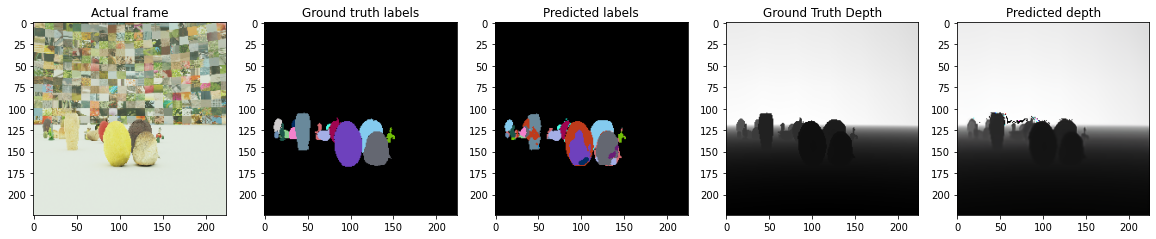

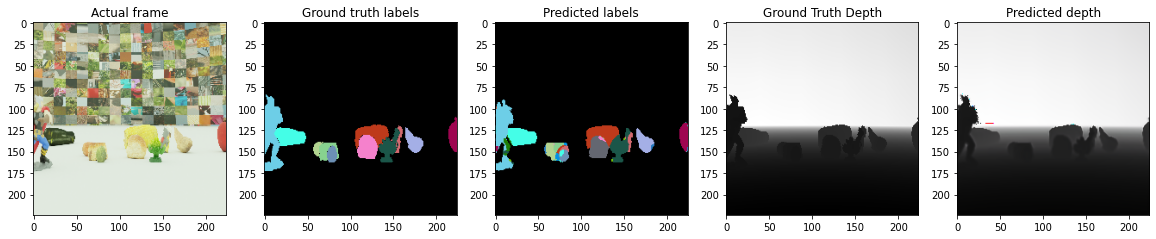

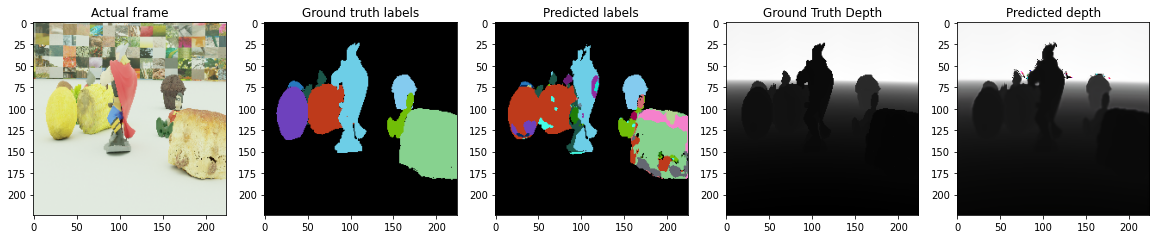

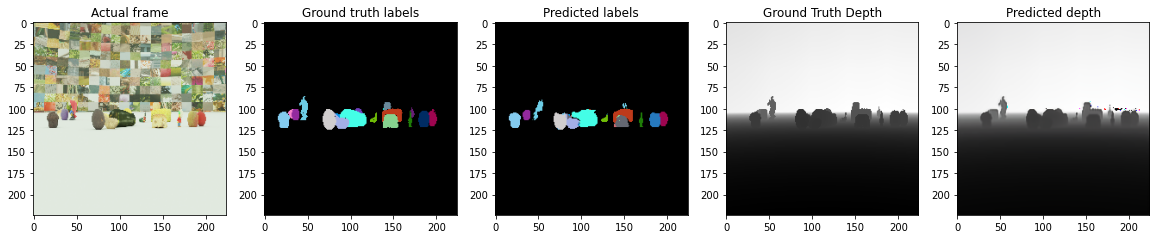

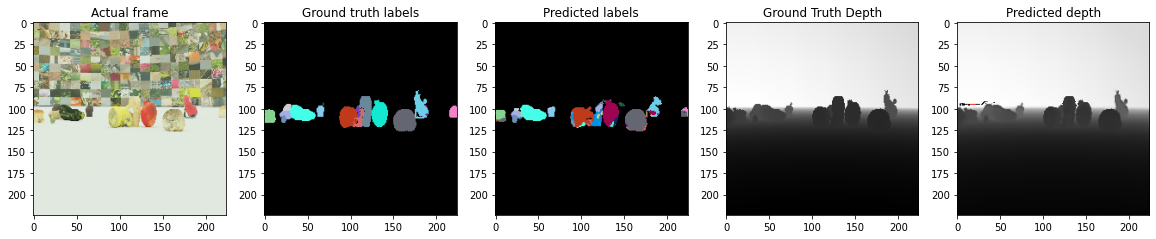

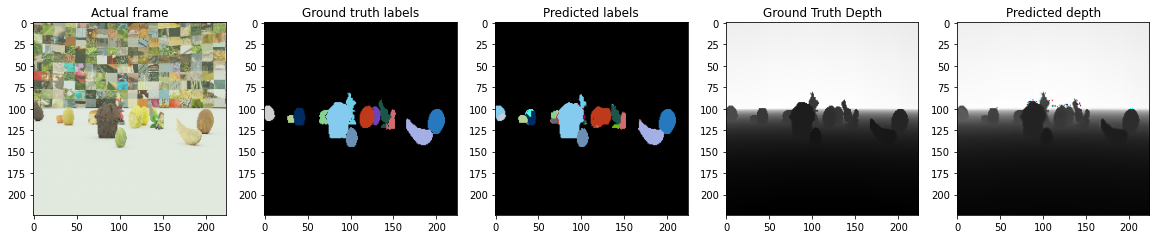

In [33]:
p = 1
for i in range(0,6):
    
    #print(batch_mask[i])
    fig = plt.figure(figsize=(20,8))
    
    ax1 = fig.add_subplot(1,5,1)
    ax1.imshow(right_img[i].astype(np.uint8))
    ax1.title.set_text('Actual frame')
    ax1.grid(False)
    
    
    ax2 = fig.add_subplot(1,5,2)
    ax2.set_title('Ground truth labels')
    ax2.imshow(onehot_to_rgb(np.asarray((mask2[i]))))
    ax2.grid(False)
    
    ax3 = fig.add_subplot(1,5,3)
    ax3.set_title('Predicted labels')
    ax3.imshow(onehot_to_rgb(pred_all[1][i]))
    ax3.grid(False)
    
    ax4 = fig.add_subplot(1,5,4)
    ax4.set_title('Ground Truth Depth')
    ax4.imshow(depth[i].astype(np.uint8))
    ax4.grid(False)
    
    ax5 = fig.add_subplot(1,5,5)
    ax5.set_title('Predicted depth')
    ax5.imshow(pred_all[2][i].astype(np.uint8))
    ax5.grid(False)
    p =p + 1
    #plt.show()
    
#plt.saveplot('StereoSegResultsRight.png')

In [ ]:
tf.image.summary('conv2d_126/filters')